In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
from shapely.ops import unary_union

In [2]:
border_file = "../../data/land/bdline_gpkg_gb/Data/bdline_gb.gpkg"
alc_file = '../../data/land/NE_AgriculturalLandClassificationProvisionalEngland_FGDB/data.gdb/'
crop_file = '../../data/land/CEH/UK_CEH_Crops_2016.gdb'

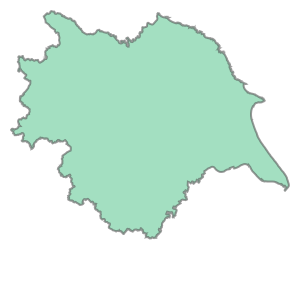

In [3]:
yorkshire_index = 66

counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
county_boundary = counties.iloc[yorkshire_index]['geometry']
county_boundary

In [4]:
crops = gpd.read_file(crop_file, mask = county_boundary)
alc = gpd.read_file(alc_file, mask = county_boundary)

In [5]:
crops["centroid"] = crops["geometry"].centroid
crops["area"] = crops["geometry"].area/10000
crops

,gid,crop_code,parent,poly_id,crop_name,geometry,centroid,area
0,1587007,ww,0,494060,Winter wheat (includes winter oats),"MULTIPOLYGON (((442984.137 508441.640, 442888....",POINT (442859.522 508448.684),7.418210
1,673398,ww,0,415700,Winter wheat (includes winter oats),"MULTIPOLYGON (((456168.692 390684.989, 456304....",POINT (456453.823 390562.285),10.239603
2,1659535,ww,0,2303231,Winter wheat (includes winter oats),"MULTIPOLYGON (((453590.697 436528.070, 453639....",POINT (453655.976 436410.488),8.387044
3,2601428,ww,0,2238521,Winter wheat (includes winter oats),"MULTIPOLYGON (((423863.797 408051.290, 423821....",POINT (423851.198 408246.850),2.445463
4,687729,ww,0,2456902,Winter wheat (includes winter oats),"MULTIPOLYGON (((432316.367 502672.490, 432027....",POINT (432151.516 502714.686),3.470141
...,...,...,...,...,...,...,...,...
123831,1779769,ot,0,5697562,Other crops,"MULTIPOLYGON (((433725.597 491622.316, 433726....",POINT (433685.983 491493.203),2.712822
123832,1216089,ot,0,2190899,Other crops,"MULTIPOLYGON (((444121.788 402841.804, 444038....",POINT (444047.538 402977.253),3.726127
123833,1208215,ot,0,2329079,Other crops,"MULTIPOLYGON (((441308.183 474123.352, 441319....",POINT (441434.846 474233.699),7.558030
123834,1351319,ot,0,2141277,Other crops,"MULTIPOLYGON (((430502.957 399956.810, 430375....",POINT (430544.812 400099.894),4.353457


In [6]:
# alc = alc.to_crs(epsg=4326)
# crops = crops.to_crs(epsg=4326)
# counties = counties.to_crs(epsg=4326)

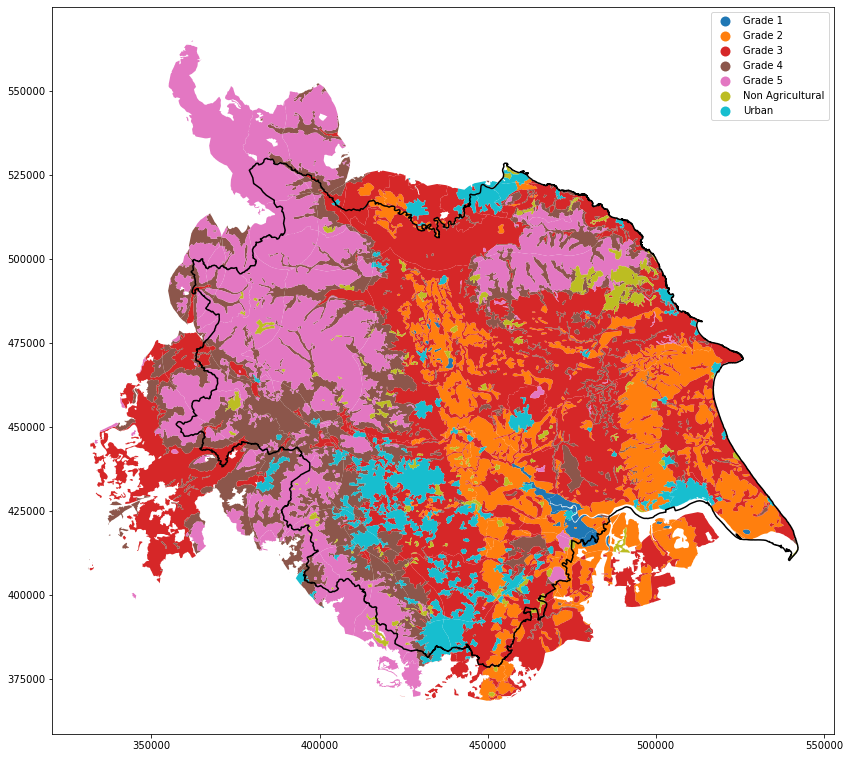

In [7]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

# for key in city_dict.keys():
#     lat, lon = city_dict[key]
#     plt.text(lon, lat, key, fontweight= 'bold')
#     plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


# plt.savefig('geogext.png', dpi=200)

In [8]:
alc

,geogext,ne_ne_admin_ne_agricultural_land_classification_provisional_engl,alc_grade,perimeter,shape_leng,shape_Length,shape_Area,geometry
0,M59J,942.1277,Grade 3,18581.668,18581.667808,18581.667808,9.421277e+06,"MULTIPOLYGON (((361710.000 486674.273, 362213...."
1,M59J,2779.4511,Grade 4,75890.818,75890.817695,75890.817694,2.779451e+07,"MULTIPOLYGON (((366852.483 492413.885, 366687...."
2,M59J,6920.5087,Grade 5,77055.780,77055.780055,77055.780055,6.920509e+07,"MULTIPOLYGON (((363656.712 488841.610, 365480...."
3,M594,7576.3830,Grade 5,62770.201,62770.200960,62770.200960,7.576383e+07,"MULTIPOLYGON (((382820.000 514160.000, 382740...."
4,M594,1440.1870,Grade 4,41455.935,41455.934853,41455.934853,1.440187e+07,"MULTIPOLYGON (((398934.944 516016.457, 399323...."
...,...,...,...,...,...,...,...,...
180,9,3483.0100,Urban,55517.719,55517.719225,55517.719225,3.483010e+07,"MULTIPOLYGON (((458230.000 455260.000, 458420...."
181,4,270.5243,Grade 2,10556.533,10556.533213,10556.533213,2.705243e+06,"MULTIPOLYGON (((462266.342 522225.004, 461881...."
182,4,130.9334,Grade 3,7086.925,7086.924806,7086.924806,1.309334e+06,"MULTIPOLYGON (((465070.285 522358.049, 464636...."
183,4,616.6531,Non Agricultural,19874.127,19874.127001,19874.127001,6.166531e+06,"MULTIPOLYGON (((455655.585 528399.549, 455702...."


In [9]:
s = gpd.GeoSeries(alc['geometry'].buffer(0), crs='EPSG:27700')
d = {'alc_grade' : alc['alc_grade'] , 'geometry' : s.intersection(counties.iloc[66]['geometry'])}
alc_final = gpd.GeoDataFrame(d, crs="EPSG:27700")

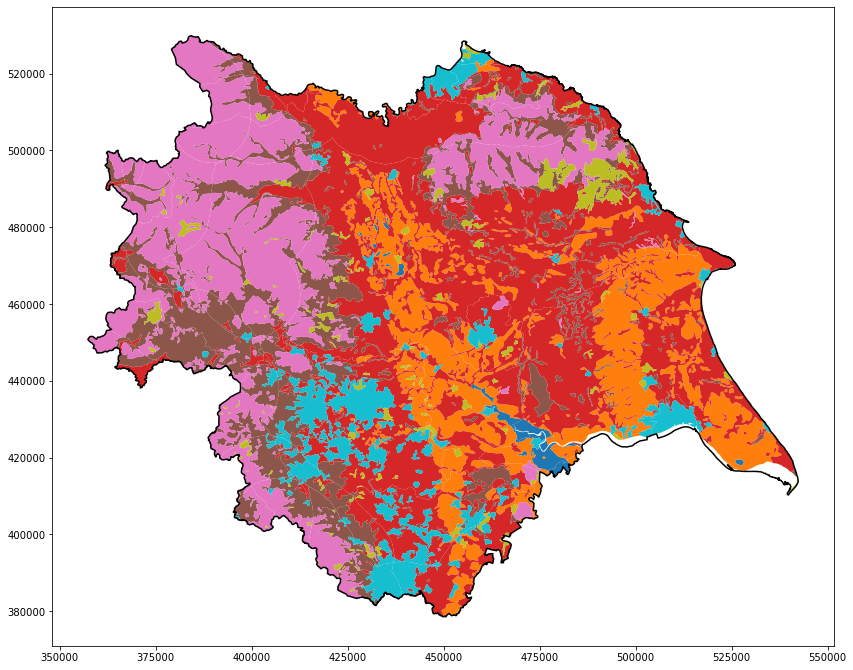

In [10]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_final.plot('alc_grade', ax=ax_base, markersize = 1)

# for key in city_dict.keys():
#     lat, lon = city_dict[key]
#     plt.text(lon, lat, key, fontweight= 'bold')
#     plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);

# plt.savefig('geogext.png', dpi=200)

In [11]:
alc_final['Area'] = alc_final.to_crs(epsg=27700)['geometry'].area / 10000
alc_final

,alc_grade,geometry,Area
0,Grade 3,"POLYGON ((367144.995 491540.000, 366966.205 49...",56.094763
1,Grade 4,"MULTIPOLYGON (((366852.483 492413.885, 366687....",1250.985703
2,Grade 5,"MULTIPOLYGON (((366687.420 493243.710, 366205....",2906.051769
3,Grade 5,"MULTIPOLYGON (((386525.045 516937.930, 386522....",259.065775
4,Grade 4,"MULTIPOLYGON (((398934.944 516016.457, 399323....",1440.186963
...,...,...,...
180,Urban,"MULTIPOLYGON (((458230.000 455260.000, 458420....",3483.010000
181,Grade 2,"MULTIPOLYGON (((462266.342 522225.004, 461881....",270.524342
182,Grade 3,"POLYGON ((465070.285 522358.049, 464636.000 52...",130.933418
183,Non Agricultural,"MULTIPOLYGON (((455655.585 528399.549, 455702....",616.653091


In [12]:
grade_poly = [unary_union(alc_final[alc_final["alc_grade"] == grade]["geometry"].to_numpy())
              for grade in np.unique(alc_final["alc_grade"])]
# for grade in range(1, 8):
#     polygons = alc_final[alc_final["alc_grade"] == f"Grade {grade}"]["geometry"].to_numpy()
#     grade_poly.append(unary_union(polygons))

grades = np.unique(alc_final["alc_grade"])

d = {'alc_grade': grades, 'geometry': grade_poly}
alc_grades_mp = gpd.GeoDataFrame(d, crs="EPSG:27700")

alc_grades_mp["area"] = alc_grades_mp["geometry"].area / 10000
alc_grades_mp

,alc_grade,geometry,area
0,Grade 1,"MULTIPOLYGON (((527560.000 418000.000, 527450....",11829.326581
1,Grade 2,"MULTIPOLYGON (((471036.260 418015.122, 471030....",255318.543838
2,Grade 3,"MULTIPOLYGON (((452943.142 416338.269, 452820....",560972.969823
3,Grade 4,"MULTIPOLYGON (((431434.343 382519.131, 431530....",266477.850853
4,Grade 5,"MULTIPOLYGON (((427356.409 383301.306, 427356....",330542.704820
5,Non Agricultural,"MULTIPOLYGON (((452284.824 378910.939, 452270....",39637.265571
6,Urban,"MULTIPOLYGON (((432068.410 381669.462, 432310....",109137.268269


In [13]:
for grade in range(1,6):
    print(f"Grade {grade}", alc_final[alc_final["alc_grade"].isin([f"Grade {grade}"])]["Area"].sum(), "Hectares")


Grade 1 11829.326580725023 Hectares
Grade 2 255318.54383789358 Hectares
Grade 3 560972.9698233716 Hectares
Grade 4 266477.8508525938 Hectares
Grade 5 330542.70482030034 Hectares


In [14]:
crop_codes = pd.unique(crops['crop_code'])
crop_names = pd.unique(crops['crop_name'])
print(crop_codes)
print(crop_names)

['ww' 'ma' 'sw' 'be' 'fb' 'sb' 'wb' 'po' 'gr' 'or' 'ot']
['Winter wheat (includes winter oats)' 'Maize' 'Spring Wheat'
 'Beet (sugar beet / fodder beet)' 'Field beans' 'Spring barley'
 'Winter barley' 'Potatoes' 'Grass' 'Oilseed rape' 'Other crops']


In [15]:
a_CA = gpd.sjoin(crops, alc_grades_mp, how="inner", op='within')
a_CA

,gid,crop_code,parent,poly_id,crop_name,geometry,centroid,area_left,index_right,alc_grade,area_right
0,1587007,ww,0,494060,Winter wheat (includes winter oats),"MULTIPOLYGON (((442984.137 508441.640, 442888....",POINT (442859.522 508448.684),7.418210,2,Grade 3,560972.969823
1,673398,ww,0,415700,Winter wheat (includes winter oats),"MULTIPOLYGON (((456168.692 390684.989, 456304....",POINT (456453.823 390562.285),10.239603,2,Grade 3,560972.969823
4,687729,ww,0,2456902,Winter wheat (includes winter oats),"MULTIPOLYGON (((432316.367 502672.490, 432027....",POINT (432151.516 502714.686),3.470141,2,Grade 3,560972.969823
5,185103,ww,0,5486218,Winter wheat (includes winter oats),"MULTIPOLYGON (((424503.447 482638.980, 424541....",POINT (424433.897 482579.257),2.316328,2,Grade 3,560972.969823
9,2579970,ww,0,2188429,Winter wheat (includes winter oats),"MULTIPOLYGON (((449983.697 391508.840, 449931....",POINT (449874.132 391420.236),2.890400,2,Grade 3,560972.969823
...,...,...,...,...,...,...,...,...,...,...,...
115292,2171280,ot,0,497464,Other crops,"MULTIPOLYGON (((475553.953 512908.973, 475503....",POINT (475553.119 513016.770),7.664815,4,Grade 5,330542.704820
115317,2204267,ot,0,2477672,Other crops,"MULTIPOLYGON (((476310.477 512700.440, 476357....",POINT (476449.116 512652.524),6.781117,4,Grade 5,330542.704820
115506,2501012,ot,0,2474748,Other crops,"MULTIPOLYGON (((485625.873 505786.839, 485618....",POINT (485745.929 505877.341),5.855408,4,Grade 5,330542.704820
119824,445926,ot,0,439986,Other crops,"MULTIPOLYGON (((472677.179 405841.822, 472480....",POINT (472627.115 406186.551),13.142636,4,Grade 5,330542.704820


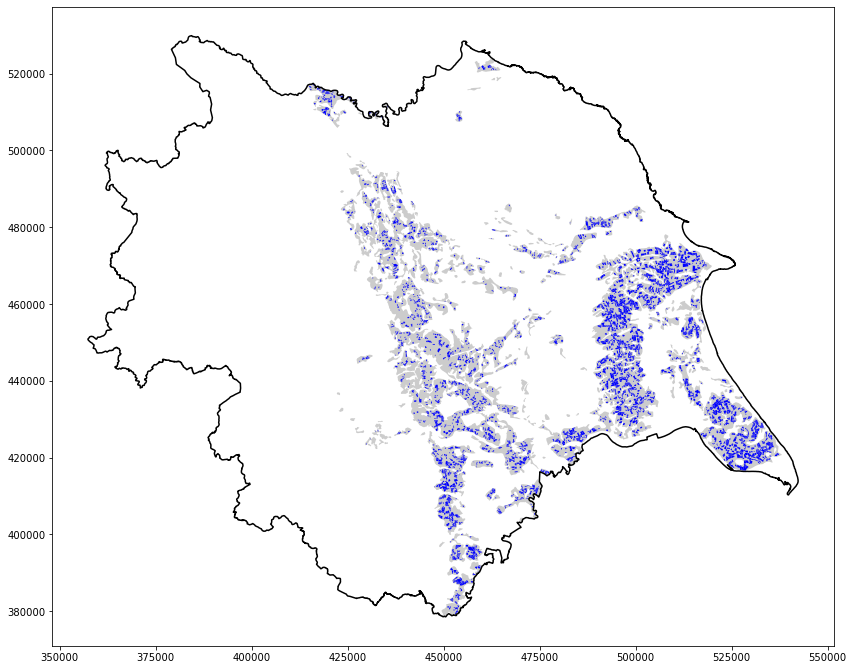

In [16]:
plot_grade = 2
plot_type = "ww"

alc_grades_mp_plot = alc_grades_mp[alc_grades_mp["alc_grade"] == f"Grade {plot_grade}"]
crops_plot = a_CA[(a_CA["crop_code"] == plot_type) & (a_CA["alc_grade"] == f"Grade {plot_grade}")]


# Plot county boundary and crop polygons on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county
ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_grades_mp_plot.plot(ax=ax_base, legend=True, color='k', alpha=0.2)
crops_plot.plot(ax=ax_base, legend=True, markersize = 4, color = 'b')

# for key in city_dict.keys():
#     lat, lon = city_dict[key]
#     plt.text(lon, lat, key, fontweight= 'bold')
#     plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


# plt.savefig('geogext.png', dpi=200)

In [17]:
f_arable_3plus = a_CA[(a_CA["crop_code"] != "gr") & 
                      (a_CA["alc_grade"].isin(grades[:2]))]["area_left"].sum()

f_arable_total = a_CA[(a_CA["crop_code"] != "gr")]["area_left"].sum()

f_livestock_3plus = a_CA[(a_CA["crop_code"] == "gr") & 
                         (a_CA["alc_grade"].isin(grades[:2]))]["area_left"].sum()

f_livestock_total = a_CA[(a_CA["crop_code"] == "gr")]["area_left"].sum()

f_arable = f_arable_3plus / f_arable_total
f_livestock = f_livestock_3plus / f_livestock_total

print(f_arable, f_livestock)

0.38341455087512644 0.06685957241453232
